In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("data/bank-additional.csv",sep=";")

In [3]:
df= df.drop("duration",axis=1)

Veri İncelemesi

In [4]:
df.shape

(4119, 20)

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [6]:
col_names=df.columns
col_names

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [7]:
df["y"].value_counts()

y
no     3668
yes     451
Name: count, dtype: int64

In [8]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [9]:
len(df.columns)

20

In [10]:
#numeric kolon sayısı
df.select_dtypes(include=["int64","float64"]).shape

(4119, 9)

In [11]:
numeric_col=df.select_dtypes(include=["int64","float64"]).columns
numeric_col

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [12]:
#kategorik kolon sayısı
df.select_dtypes(include=["object"]).shape

(4119, 11)

In [13]:
kategoric_col=df.select_dtypes(include=["object"]).columns
kategoric_col

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

Numeric değişkenleri incelemek ve data içinde bir terslik var mı diye şekil dağılımına bakacağız.

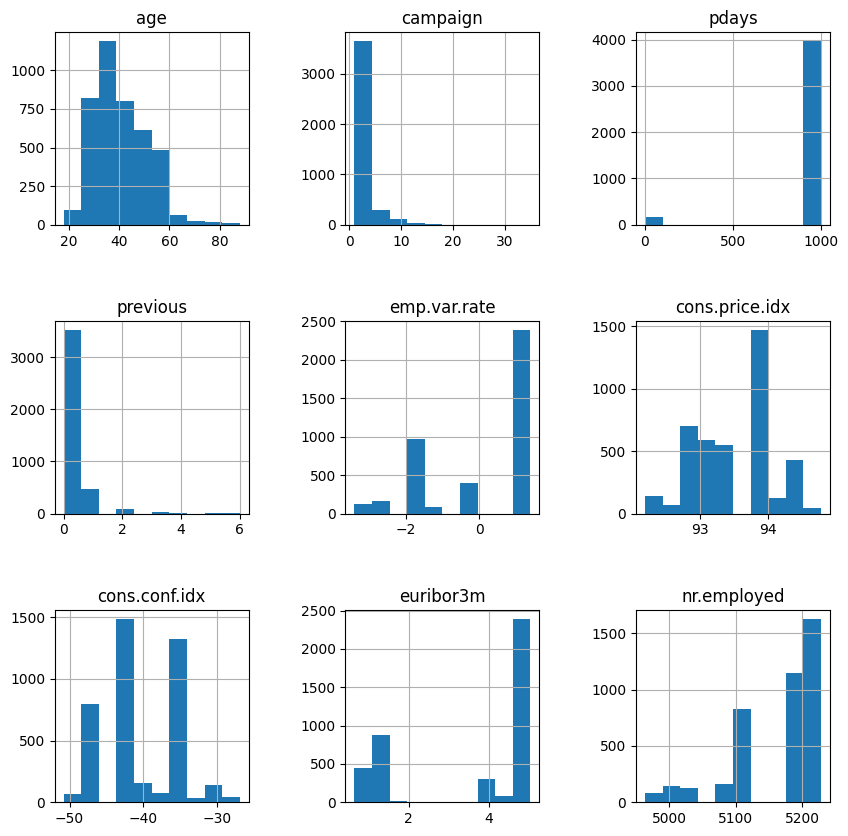

In [14]:
df.hist(column=numeric_col, figsize=(10,10))
plt.subplots_adjust(wspace=0.5,hspace=0.5)
plt.show()

**Kategorik Değişkenler** üzerinde işlemler yağılacak. Kategorik değişkenler 2'ye ayrılıyor:

**Ordinal:** Ordinal değişkenlerde sıra önemlidir. ('çok memnunum', 'memnunun', 'az memnunum', 'memnun değilim' gibi.)

**Nominal:** Nominal değişkenlerde sıra önemli değildir. ('mavi', 'yeşil', 'kırmızı' gibi.)

Nominal olanlar:

In [15]:
df["poutcome"].value_counts()

poutcome
nonexistent    3523
failure         454
success         142
Name: count, dtype: int64

In [16]:
#burada belirli bir işlemi tüm elemanlara uygulamak için map fonksiyonunnu kullanıyoruz.
df["poutcome"]= df["poutcome"].map({"failure":-1,"nonexistent":0,"success":1})

In [17]:
print(df["housing"].value_counts(),"\n", df["loan"].value_counts())

housing
yes        2175
no         1839
unknown     105
Name: count, dtype: int64 
 loan
no         3349
yes         665
unknown     105
Name: count, dtype: int64


In [18]:
df["housing"]= df["housing"].map({"yes":-1,"unknown":0,"no":1})
df["loan"]= df["loan"].map({"yes":-1,"unknown":0,"no":1})

In [19]:
print(df["housing"].value_counts(),"\n", df["loan"].value_counts())

housing
-1    2175
 1    1839
 0     105
Name: count, dtype: int64 
 loan
 1    3349
-1     665
 0     105
Name: count, dtype: int64


Ordinal olan:

In [20]:
df["default"].value_counts()

default
no         3315
unknown     803
yes           1
Name: count, dtype: int64

In [21]:
df["default"]= df["default"].map({"yes":-1,"unknown":0,"no":1})
df["default"].value_counts()

default
 1    3315
 0     803
-1       1
Name: count, dtype: int64

Kategorik değişkenler için **one-hot-encoding** yapacağız. Bunu nominal olanlar için yapacağız ordinal olanlarda yapılırsa sıralama derecesi korunmaz bu yüzden onlar ordinal encoding daha uygun olur.

In [22]:
kategoric_col

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [23]:
nominal=['job','marital','education','contact','month','day_of_week']

In [24]:
df= pd.get_dummies(df,columns=nominal, drop_first=True)

In [25]:
df.head()

,age,default,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,30,1,-1,1,2,999,0,0,-1.8,92.893,...,False,False,True,False,False,False,False,False,False,False
1,39,1,1,1,4,999,0,0,1.1,93.994,...,False,False,True,False,False,False,False,False,False,False
2,25,1,-1,1,1,999,0,0,1.4,94.465,...,True,False,False,False,False,False,False,False,False,True
3,38,1,0,0,3,999,0,0,1.4,94.465,...,True,False,False,False,False,False,False,False,False,False
4,47,1,-1,1,1,999,0,0,-0.1,93.200,...,False,False,False,True,False,False,True,False,False,False


In [26]:
df.columns

Index(['age', 'default', 'housing', 'loan', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'contact_telephone',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed'],
      dtype='object')

In [27]:
boolean_columns = [ 'job_blue-collar',
    'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
    'job_self-employed', 'job_services', 'job_student', 'job_technician',
    'job_unemployed', 'job_unknown', 'marital_married',
    'marital_single', 'marital_unknown',
    'education_basic.6y', 'education_basic.9y', 'education_high.school',
    'education_illiterate', 'education_professional.course',
    'education_university.degree', 'education_unknown',
    'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
    'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
    'month_sep', 'day_of_week_mon', 'day_of_week_thu',
    'day_of_week_tue', 'day_of_week_wed'
]

# Belirtilen sütunları 1 ve 0'a dönüştür
df[boolean_columns] = df[boolean_columns].astype(int)

Son olarak target variable y'yi de encode edelim:

In [28]:
df["y"]=df["y"].map({"yes":1,"no":0})
df.head()

,age,default,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,30,1,-1,1,2,999,0,0,-1.8,92.893,...,0,0,1,0,0,0,0,0,0,0
1,39,1,1,1,4,999,0,0,1.1,93.994,...,0,0,1,0,0,0,0,0,0,0
2,25,1,-1,1,1,999,0,0,1.4,94.465,...,1,0,0,0,0,0,0,0,0,1
3,38,1,0,0,3,999,0,0,1.4,94.465,...,1,0,0,0,0,0,0,0,0,0
4,47,1,-1,1,1,999,0,0,-0.1,93.200,...,0,0,0,1,0,0,1,0,0,0


**Girdi ve Çıktıların belirlenmesi**

In [29]:
X= df.drop(["y"],axis=1)
y=df["y"]

In [30]:
X.shape

(4119, 48)

In [31]:
y.shape

(4119,)

**Train-Test Split**

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=0)

**Feature Scaling**

In [33]:
cols=X_train.columns

In [34]:
X_train[numeric_col]

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
3199,30,2,999,0,1.1,93.994,-36.4,4.856,5191.0
3258,42,2,999,0,1.4,93.444,-36.1,4.968,5228.1
3153,48,1,999,0,-0.1,93.200,-42.0,4.191,5195.8
399,30,2,999,1,-0.1,93.200,-42.0,4.021,5195.8
1410,28,1,999,0,-1.8,92.893,-46.2,1.291,5099.1
...,...,...,...,...,...,...,...,...,...
1033,50,17,999,0,1.4,94.465,-41.8,4.961,5228.1
3264,45,3,999,0,1.4,93.918,-42.7,4.961,5228.1
1653,27,2,999,0,-2.9,92.201,-31.4,0.879,5076.2
2607,56,3,999,0,1.4,93.918,-42.7,4.962,5228.1


In [35]:
# StandardScaler oluştur
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

#öğrenmek için kullandığımız  numeric girdileri scale et ve yeni hale dönüştür
X_train= scaler.fit_transform(X_train)

#Test kısmını sadece dönüştürüyoruz
X_test= scaler.transform(X_test)

In [36]:
# StandardScaler transform sonrası veri yapıları değişir ndarray tipi olur
type(X_train)

numpy.ndarray

In [37]:
#biz bunu tekrar DataFrame tipine dönüştürücez
X_train=pd.DataFrame(X_train, columns=[cols])
X_test=pd.DataFrame(X_test, columns=[cols])

In [38]:
X_train[cols]

,age,default,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,-0.977249,0.491928,-0.917247,0.464636,-0.195607,0.204284,-0.356918,0.200672,0.656694,0.724940,...,-0.381170,-0.109444,1.418409,-0.355121,-0.12413,-0.126628,-0.514189,-0.510412,1.951978,-0.487638
1,0.179962,0.491928,-0.917247,0.464636,-0.195607,0.204284,-0.356918,0.200672,0.848657,-0.225414,...,-0.381170,-0.109444,-0.705015,-0.355121,-0.12413,-0.126628,-0.514189,-0.510412,1.951978,-0.487638
2,0.758567,0.491928,-0.917247,0.464636,-0.587892,0.204284,-0.356918,0.200672,-0.111158,-0.647026,...,-0.381170,-0.109444,-0.705015,2.815944,-0.12413,-0.126628,1.944812,-0.510412,-0.512301,-0.487638
3,-0.977249,0.491928,1.118677,0.464636,-0.195607,0.204284,1.495123,-2.444187,-0.111158,-0.647026,...,-0.381170,-0.109444,-0.705015,2.815944,-0.12413,-0.126628,-0.514189,-0.510412,-0.512301,-0.487638
4,-1.170117,0.491928,1.118677,0.464636,-0.587892,0.204284,-0.356918,0.200672,-1.198948,-1.177496,...,-0.381170,-0.109444,1.418409,-0.355121,-0.12413,-0.126628,-0.514189,-0.510412,1.951978,-0.487638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3290,0.951435,-2.025002,1.118677,0.464636,5.688668,0.204284,-0.356918,0.200672,0.848657,1.538789,...,2.623504,-0.109444,-0.705015,-0.355121,-0.12413,-0.126628,1.944812,-0.510412,-0.512301,-0.487638
3291,0.469264,-2.025002,-0.917247,-2.252268,0.196678,0.204284,-0.356918,0.200672,0.848657,0.593618,...,-0.381170,-0.109444,-0.705015,-0.355121,-0.12413,-0.126628,-0.514189,-0.510412,1.951978,-0.487638
3292,-1.266551,0.491928,-0.917247,0.464636,-0.195607,0.204284,-0.356918,0.200672,-1.902812,-2.373214,...,-0.381170,-0.109444,-0.705015,-0.355121,-0.12413,-0.126628,-0.514189,-0.510412,-0.512301,2.050700
3293,1.530041,0.491928,-0.917247,-2.252268,0.196678,0.204284,-0.356918,0.200672,0.848657,0.593618,...,-0.381170,-0.109444,-0.705015,-0.355121,-0.12413,-0.126628,1.944812,-0.510412,-0.512301,-0.487638


**AdaBoost**

In [40]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score

#Sınıftan bir obje oluşturma
abc= AdaBoostClassifier(n_estimators=400, learning_rate=1, random_state=0)

model_abc= abc.fit(X_train,y_train)

y_pred_abc= model_abc.predict(X_test)

#roc-auc
print('AdaBoost ile ROC-AUC score: {0:0.2f}'.format(roc_auc_score(y_test, y_pred_abc)))

AdaBoost ile ROC-AUC score: 0.62


**XGBoost**

In [41]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

xgb= XGBClassifier(n_estimators=400, max_depth=6, learning_rate=1, random_state=0)

model_xgb=xgb.fit(X_train,y_train)

y_pred_xgb=model_xgb.predict(X_test)

print('XGBoost ile ROC-AUC score: {0:0.2f}'.format(roc_auc_score(y_test, y_pred_xgb)))

XGBoost ile ROC-AUC score: 0.60
